<a href="https://colab.research.google.com/github/Rishav273/Ineuron-Assignments/blob/main/XGBoost_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                 'native_country', 'wage_class']
train_set.columns = col_names
test_set.columns = col_names

In [4]:
# Training data:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Testing data:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
# Joining train and test data for preprocessing:
df = pd.concat([train_set,test_set])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [8]:
df.shape

(48842, 15)

In [13]:
print(df['workclass'].unique())
print("*"*75)
print(df['occupation'].unique())
print("*"*75)
print(df['native_country'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
***************************************************************************
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
***************************************************************************
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong'

There doesn't seem to be any missing values at first glance. However, on further inspection, we find that missing values are denoted by "?" marks. So we'll remove those. 

In [14]:
df.replace(' ?',np.nan,inplace=True)
df = df.dropna()

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

### Feature Engineering:

In [16]:
# Workclass:
df.wage_class.unique()
df = df.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


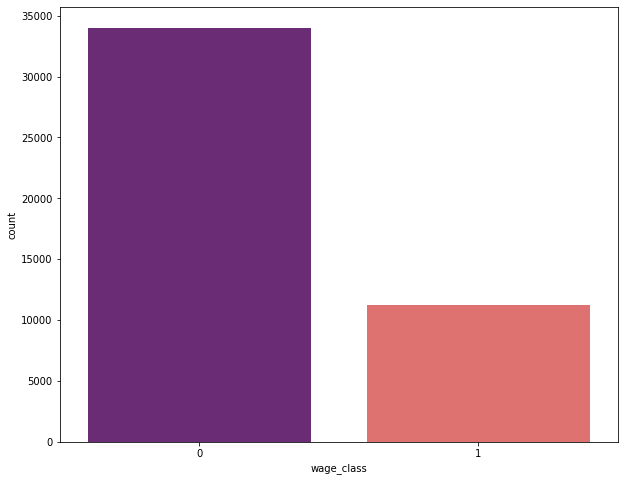

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(df['wage_class'],palette="magma")

Significantly less people earn wages.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

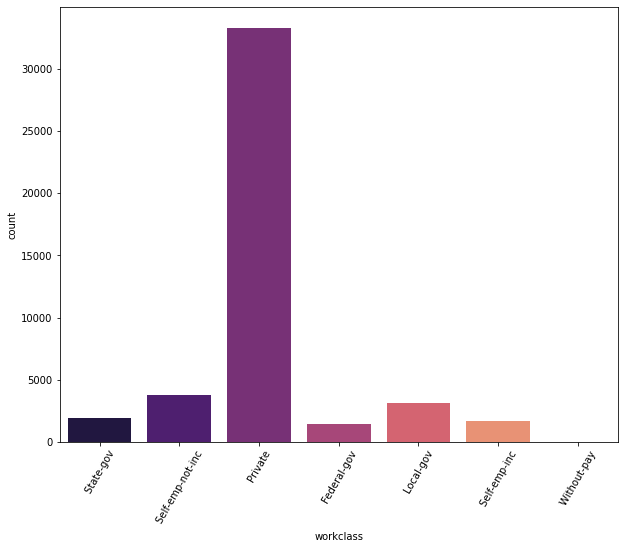

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'],palette="magma")
plt.xticks(rotation=60)

Private sector makes up the largest share of the workforce.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

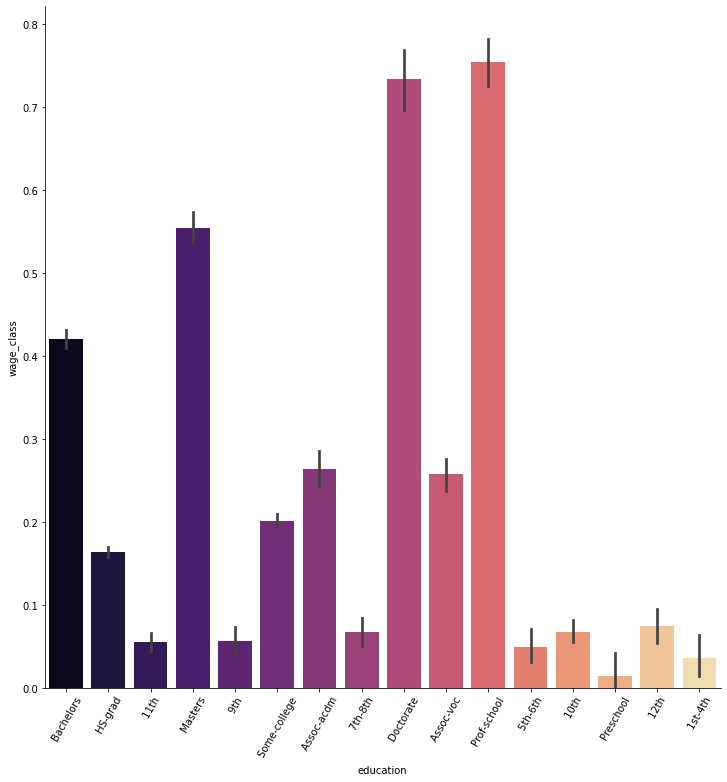

In [25]:
# Education:
sns.catplot(x='education',y='wage_class',data=df,height=10,palette='magma',kind='bar')
plt.xticks(rotation=60)

Most of the data points correspond to Doctorates, school profs and people with masters degrees. Also, we can consolidate the different school standards as a single "school" category.

In [26]:
def school(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'school'
    else:
        return x

df['education'] = df['education'].apply(school)

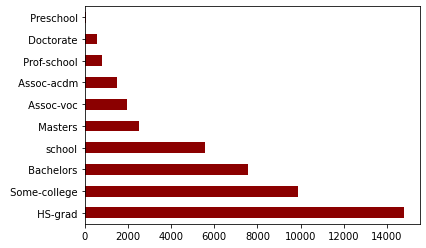

In [28]:
df['education'].value_counts().plot.barh(color="darkred")

Marital Status:

In [29]:
df['marital_status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

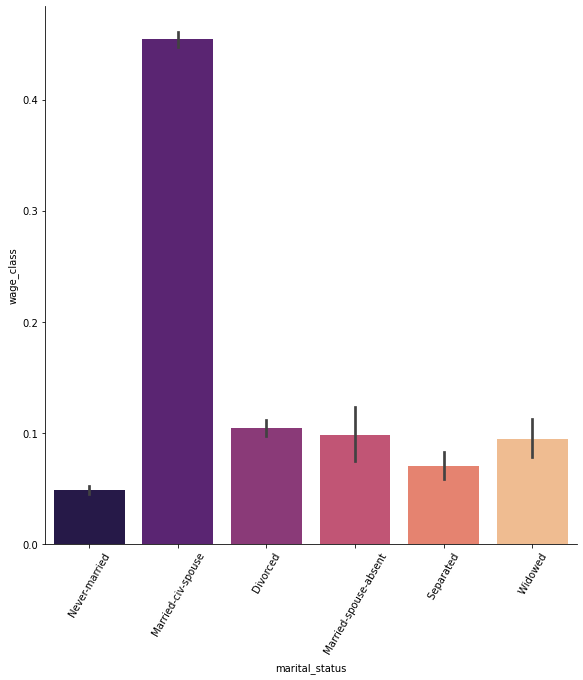

In [31]:
df['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)
sns.catplot(x='marital_status',y='wage_class',data=df,palette='magma',kind='bar',height=8)
plt.xticks(rotation=60)

Occupation:

In [32]:
df['occupation'].fillna('0',inplace=True)
df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [33]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)
df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
0                       14
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

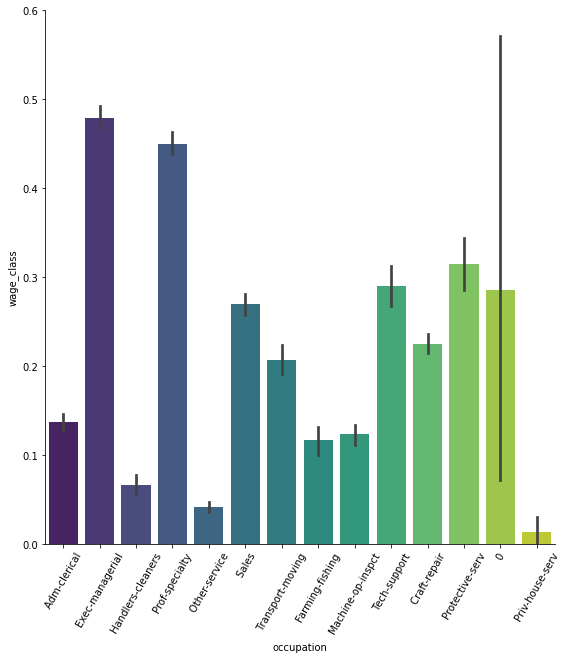

In [34]:
sns.catplot(x='occupation',y='wage_class',data=df,palette='viridis',kind='bar',height=8)
plt.xticks(rotation=60)

Relationship:

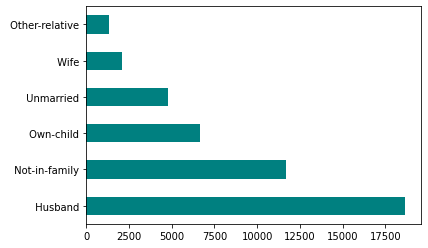

In [35]:
df['relationship'].value_counts().plot.barh(color="teal")

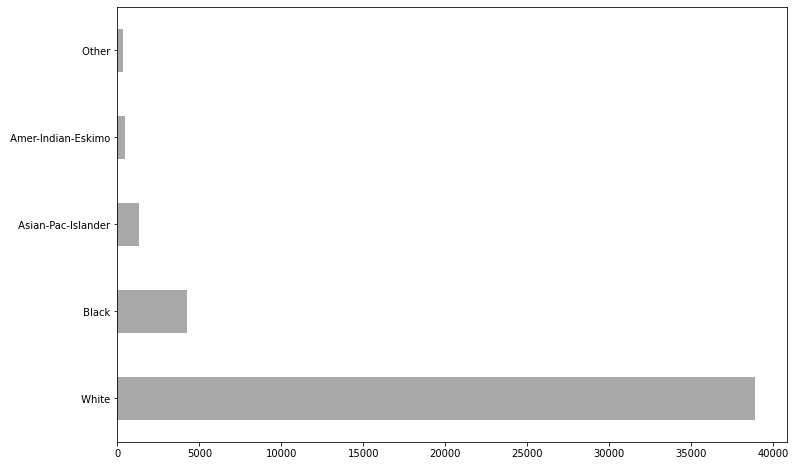

In [37]:
plt.figure(figsize=(12,8))
df['race'].value_counts().plot.barh(color="darkgrey")

Native_country

In [41]:
def change_stuff(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

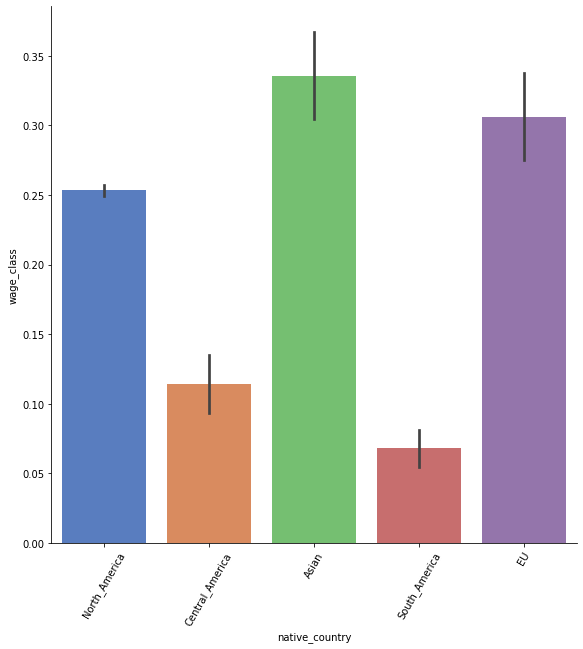

In [42]:
df['native_country'] = df['native_country'].apply(change_stuff)
sns.catplot(x='native_country',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

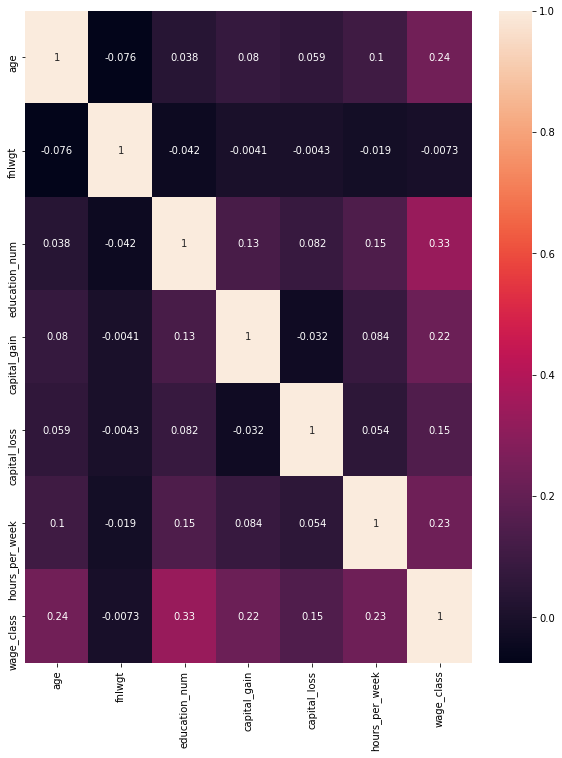

In [43]:
corr_matrix = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix,annot=True)

Splitting data into train and test:

In [44]:
X = df.drop(['wage_class'],axis=1)
y = df['wage_class']

In [45]:
X_d = pd.get_dummies(X,drop_first=True)

In [46]:
X_d.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,education_school,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_0,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_Central_America,native_country_EU,native_country_North_America,native_country_South_America
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [50]:
y.value_counts()

0    34014
1    11208
Name: wage_class, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_d,y,test_size=0.3,random_state=101)

In [48]:
# Feature scaling:
from sklearn.preprocessing import StandardScaler

# Instantiating the scaler:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
param_dist = {'learning_rate':[0.01,0.001],
                        'max_depth': [4,6,8,12,16],
                        'n_estimators':[10,50,100,200]
                    }   

In [54]:
# Random Search:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgbc = XGBClassifier()
r_search = RandomizedSearchCV(xgbc,param_dist,scoring='f1',cv=5,n_jobs=-1,verbose=2)

In [55]:
r_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [56]:
pred = r_search.predict(X_test_scaled)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
print('Confusion Matrix:\n\n',(confusion_matrix(y_test,pred)))
print('*'*50)
print('Classification Report: \n\n',(classification_report(y_test,pred)))

Confusion Matrix:

 [[9622  528]
 [1350 2067]]
**************************************************
Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.95      0.91     10150
           1       0.80      0.60      0.69      3417

    accuracy                           0.86     13567
   macro avg       0.84      0.78      0.80     13567
weighted avg       0.86      0.86      0.85     13567

